<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/w_dad_debugging_version_Muse_and_Electrodes_Eyes_open_closed_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

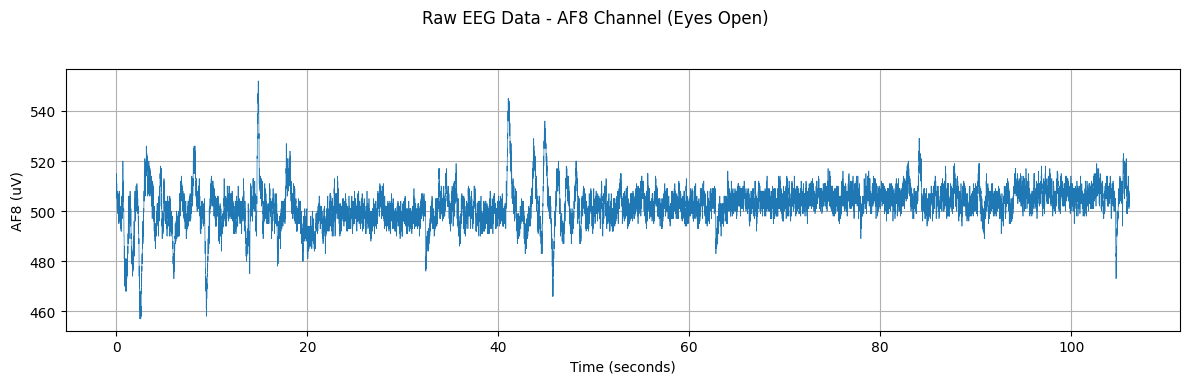

In [21]:

import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 250  # Hz
duration = 10  # seconds
num_samples = sampling_rate * duration


eeg_data = np.loadtxt("/content/EyesClosedAF7-1min.txt", delimiter=',', usecols=0)

num_samples = len(eeg_data)
duration = num_samples / sampling_rate


# Time vector
# Ensure the time vector matches the length of the actual data
time_vector = np.arange(0, duration, 1/sampling_rate)[:num_samples]


# Plotting the raw EEG data for a single channel
# Since eeg_data is 1D, we plot a single axis.
fig, ax = plt.subplots(1, 1, figsize=(12, 4)) # Create a single subplot

fig.suptitle('Raw EEG Data - AF8 Channel (Eyes Open)')

# Plotting the single channel data
ax.plot(time_vector, eeg_data, lw=0.5) # Plot the 1D data directly
ax.set_ylabel('AF8 (uV)') # Set label for the single channel
ax.grid(True)

ax.set_xlabel('Time (seconds)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

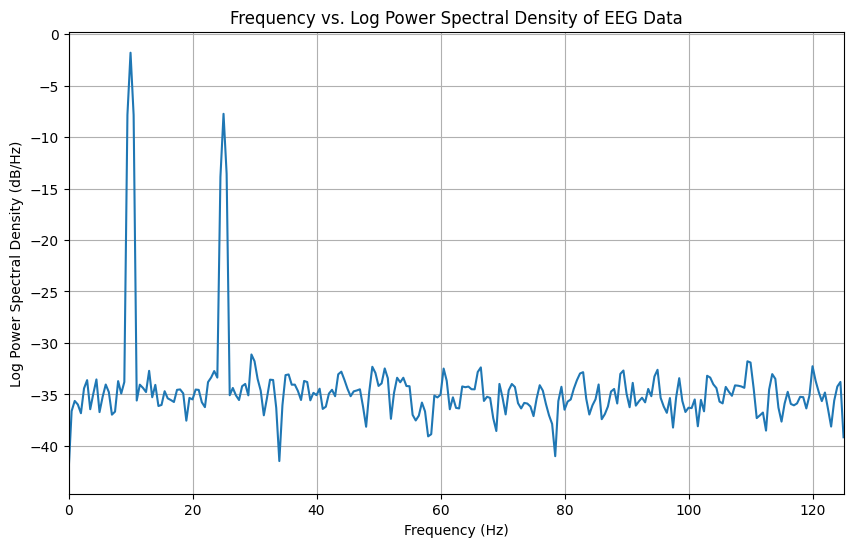

In [22]:
# prompt: take this Electroenchaephagraphy data and make a plot of frequency v.s. log power spectral density

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Assume 'eeg_data' is your raw EEG data (a 1D NumPy array)
# Replace this with your actual EEG data
# For demonstration, let's create some dummy data
sampling_frequency = 250  # Hz (replace with your actual sampling frequency)
duration = 10  # seconds
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)
eeg_data = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 25 * t) + np.random.randn(len(t)) * 0.2

# --- Processing Steps ---

# Compute the Power Spectral Density (PSD) using Welch's method
# 'fs' is the sampling frequency
# 'nperseg' is the length of each segment for Welch's method. A common choice is 2*fs.
# Adjust this based on your data characteristics and desired frequency resolution.
frequencies, psd = welch(eeg_data, fs=sampling_frequency, nperseg=2 * sampling_frequency)

# Convert PSD to log power spectral density (using log10)
log_psd = 10 * np.log10(psd)

# --- Plotting ---

plt.figure(figsize=(10, 6))
plt.plot(frequencies, log_psd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data")
plt.grid(True)
plt.xlim([0, sampling_frequency / 2]) # Limit x-axis to Nyquist frequency
plt.show()


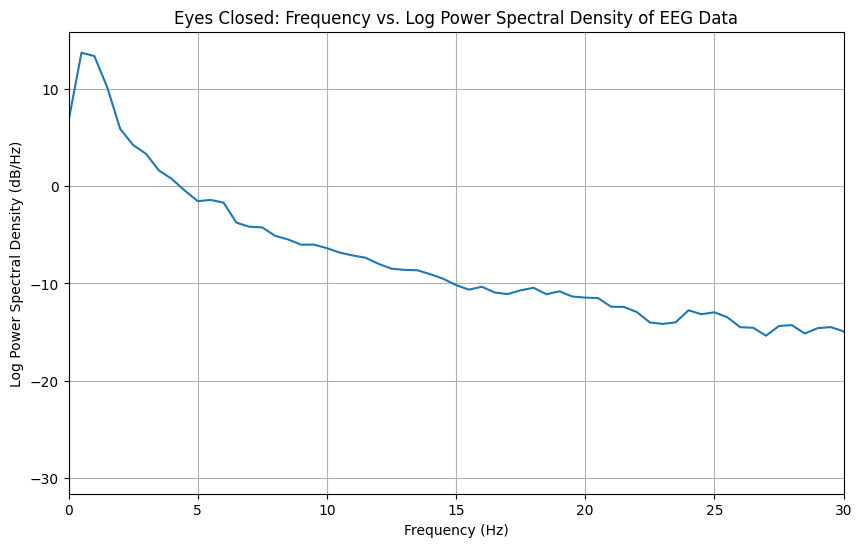

In [23]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch


sampling_frequency = 250
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch


sampling_frequency = 250
duration = 120  # seconds
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)
eeg_data = np.loadtxt("/content/EyesClosedAF7-1min.txt", delimiter=',', usecols=0)

frequencies, psd = welch(eeg_data, fs=sampling_frequency, nperseg=2 * sampling_frequency)

log_psd = 10 * np.log10(psd)

# --- Plotting ---

plt.figure(figsize=(10, 6))
plt.plot(frequencies, log_psd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Eyes Closed: Frequency vs. Log Power Spectral Density of EEG Data")
plt.grid(True)
plt.xlim([0, 30])
plt.show()


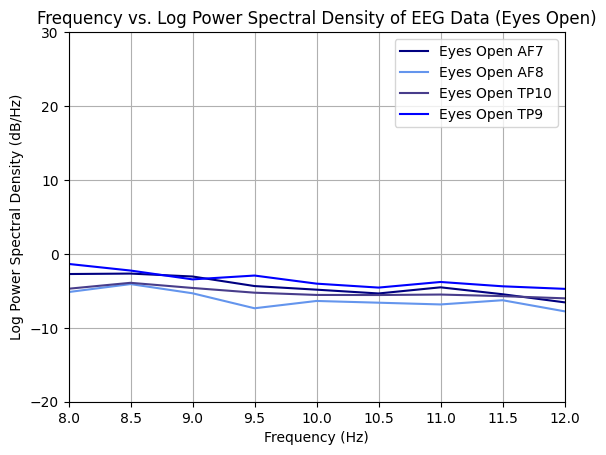

In [24]:

import matplotlib.pyplot as plt
import numpy as np

sampling_frequency = 450
duration = 60


# Recompute PSD for the eyes open data
eeg_data_eyes_openAF7 = np.loadtxt("/content/EyesOpenAF7-1min.txt", delimiter=',', usecols=0)
frequencies_open, psd_open = welch(eeg_data_eyes_openAF7, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_open = 10 * np.log10(psd_open)
plt.plot(frequencies_open, log_psd_open, label='Eyes Open AF7', color = 'navy')

eeg_data_eyes_openAF8 = np.loadtxt("/content/EyesOpenAF8-1min.txt", delimiter=',', usecols=0)
frequencies_open, psd_open = welch(eeg_data_eyes_openAF8, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_open = 10 * np.log10(psd_open)
plt.plot(frequencies_open, log_psd_open, label='Eyes Open AF8', color = 'cornflowerblue')

eeg_data_eyes_openTP10 = np.loadtxt("/content/EyesOpenTP10-1min.txt", delimiter=',', usecols=0)
frequencies_open, psd_open = welch(eeg_data_eyes_openTP10, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_open = 10 * np.log10(psd_open)
plt.plot(frequencies_open, log_psd_open, label='Eyes Open TP10', color = 'darkslateblue')

eeg_data_eyes_openTP9 = np.loadtxt("/content/EyesOpenTP9-1min.txt", delimiter=',', usecols=0)
frequencies_open, psd_open = welch(eeg_data_eyes_openTP9, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_open = 10 * np.log10(psd_open)
plt.plot(frequencies_open, log_psd_open, label='Eyes Open TP9', color = 'blue')




plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data (Eyes Open)")
plt.grid(True)
plt.xlim([8, 12])
plt.ylim([-20, 30])
plt.legend()
plt.show()

[505. 506. 509. ... 503. 507. 508.]


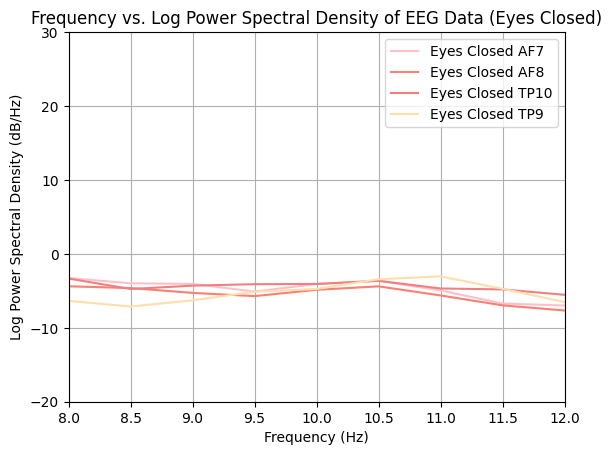

In [25]:
import matplotlib.pyplot as plt
import numpy as np


eeg_data_eyes_closedAF7 = np.loadtxt("/content/EyesClosedAF7-1min.txt", delimiter=',', usecols=0)
frequencies_open, psd_open = welch(eeg_data_eyes_closedAF7, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_open = 10 * np.log10(psd_open)
plt.plot(frequencies_open, log_psd_open, label='Eyes Closed AF7', color = 'pink')


print(eeg_data_eyes_closedAF7)


eeg_data_eyes_closedAF8 = np.loadtxt("/content/EyesClosedAF8-1min.txt", delimiter=',', usecols=0)
frequencies_open, psd_open = welch(eeg_data_eyes_closedAF8, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_open = 10 * np.log10(psd_open)
plt.plot(frequencies_open, log_psd_open, label='Eyes Closed AF8', color = 'salmon')

eeg_data_eyes_closedTP10 = np.loadtxt("/content/EyesClosedTP10-1min.txt", delimiter=',', usecols=0)
frequencies_open, psd_open = welch(eeg_data_eyes_closedTP10, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_open = 10 * np.log10(psd_open)
plt.plot(frequencies_open, log_psd_open, label='Eyes Closed TP10', color = 'lightcoral')

eeg_data_eyes_closedTP9 = np.loadtxt("/content/EyesClosedTP9-1min.txt", delimiter=',', usecols=0)
frequencies_open, psd_open = welch(eeg_data_eyes_closedTP9, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_open = 10 * np.log10(psd_open)
plt.plot(frequencies_open, log_psd_open, label='Eyes Closed TP9', color = 'navajowhite')



plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data (Eyes Closed)")
plt.grid(True)
plt.xlim([8, 12])
plt.ylim([-20, 30])
plt.legend()
plt.show()

<ipython-input-80-5a8aabaee912>:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_close25 = df_close25.applymap(add_70)


[811. 810. 812. ... 816. 816. 813.]


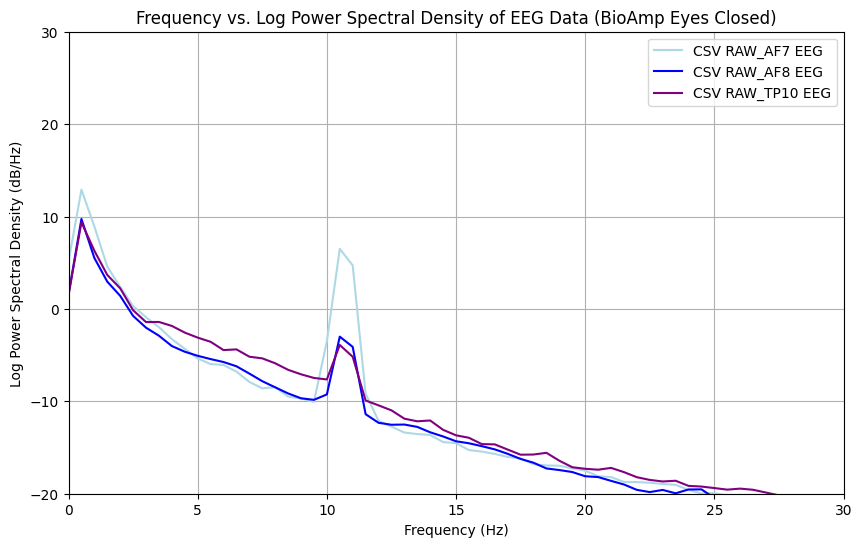

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def add_70(x):
    return x + 300



sampling_frequency = 80
duration = 60
plt.figure(figsize=(10, 6))


csv_file_close22 = "/content/EyesClosedTP9-1min.txt"  # Replace with your file path
df_close22 = pd.read_csv(csv_file_close22)
eeg_data_close22 = df_close22.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close22, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
#plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP9 EEG', color='mediumslateblue')



csv_file_close23 = "/content/EyesClosedAF7-1min.txt"  # Replace with your file path
df_close23 = pd.read_csv(csv_file_close23)
eeg_data_close23 = df_close23.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close23, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF7 EEG', color='lightblue')


csv_file_close24 = "/content/EyesClosedAF8-1min.txt"  # Replace with your file path
df_close24 = pd.read_csv(csv_file_close24)
eeg_data_close24 = df_close24.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close24, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF8 EEG', color='blue')



csv_file_close25 = "/content/EyesClosedTP10-1min.txt"  # Replace with your file path
df_close25 = pd.read_csv(csv_file_close25)
#print(df_close25)
df_close25 = df_close25.applymap(add_70)
#print(df_close25)




eeg_data_close25 = df_close25.iloc[:, 0]
eeg_data_close25_clean = pd.to_numeric(eeg_data_close25, errors='coerce').dropna().values

print(eeg_data_close25_clean)

frequencies_csv, psd_csv = welch(eeg_data_close25_clean, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP10 EEG', color='purple')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data (BioAmp Eyes Closed)")
plt.grid(True)
plt.ylim([-20, 30])
plt.xlim([0, 30])
plt.legend()
plt.show()

       516.00  0.01
0       516.0  0.01
1       516.0  0.02
2       513.0  0.02
3       513.0  0.03
4       516.0  0.03
...       ...   ...
25461   510.0  0.09
25462   511.0  0.09
25463   512.0  0.09
25464   510.0  0.09
25465   510.0  0.09

[25466 rows x 2 columns]
       516.00  0.10
0       515.0  0.10
1       515.0  0.10
2       515.0  0.10
3       514.0  0.10
4       516.0  0.10
...       ...   ...
26547   496.0  0.09
26548   497.0  0.09
26549   498.0  0.09
26550   496.0  0.09
26551   493.0  0.09

[26552 rows x 2 columns]


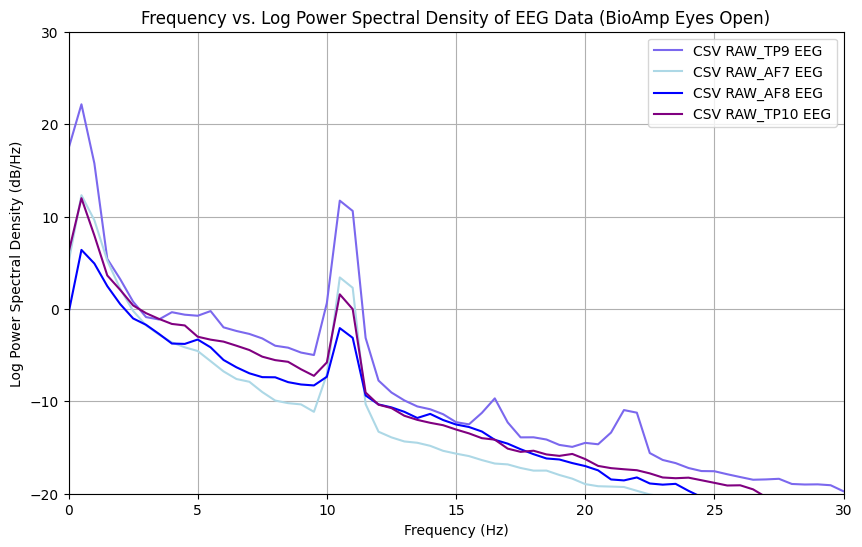

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sampling_frequency = 80
duration = 60
plt.figure(figsize=(10, 6))


csv_file_close22 = "/content/EyesOpenTP9-1min.txt"  # Replace with your file path
df_close22 = pd.read_csv(csv_file_close22)
eeg_data_close22 = df_close22.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close22, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP9 EEG', color='mediumslateblue')



csv_file_close23 = "/content/EyesOpenAF7-1min.txt"  # Replace with your file path
df_close23 = pd.read_csv(csv_file_close23)
eeg_data_close23 = df_close23.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close23, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF7 EEG', color='lightblue')



csv_file_close24 = "/content/EyesOpenAF8-1min.txt"  # Replace with your file path
df_close24 = pd.read_csv(csv_file_close24)
print(df_close24)
eeg_data_close24 = df_close24.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close24, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF8 EEG', color='blue')



csv_file_close25 = "/content/EyesOpenTP10-1min.txt"  # Replace with your file path
df_close25 = pd.read_csv(csv_file_close25)
print(df_close25)
eeg_data_close25 = df_close25.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close25, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP10 EEG', color='purple')





plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data (BioAmp Eyes Open)")
plt.grid(True)
plt.ylim([-20, 30])
plt.xlim([0, 30])
plt.legend()
plt.show()

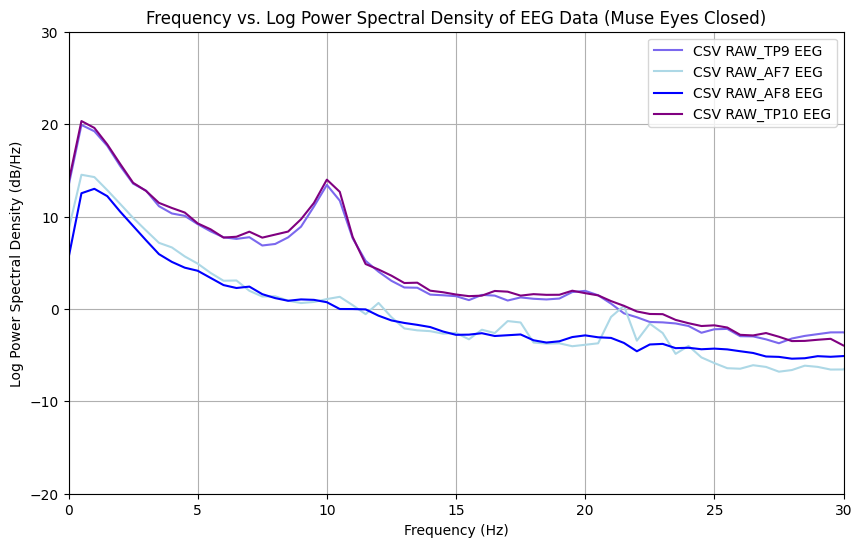

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sampling_frequency = 256
duration = 180
plt.figure(figsize=(10, 6))


csv_file_close22 = "/content/test_muse_data_close_22.txt"  # Replace with your file path
df_close22 = pd.read_csv(csv_file_close22)
eeg_data_close22 = df_close22.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close22, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP9 EEG', color='mediumslateblue')



csv_file_close23 = "/content/test_muse_data_close_23.txt"  # Replace with your file path
df_close23 = pd.read_csv(csv_file_close23)
eeg_data_close23 = df_close23.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close23, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF7 EEG', color='lightblue')


csv_file_close24 = "/content/test_muse_data_close_24.txt"  # Replace with your file path
df_close24 = pd.read_csv(csv_file_close24)
eeg_data_close24 = df_close24.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close24, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF8 EEG', color='blue')



csv_file_close25 = "/content/test_muse_data_close_25.txt"  # Replace with your file path
df_close25 = pd.read_csv(csv_file_close25)
eeg_data_close25 = df_close25.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close25, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP10 EEG', color='purple')






plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data (Muse Eyes Closed)")
plt.grid(True)
plt.xlim([0, 30])
plt.ylim([-20, 30])
plt.legend()
plt.show()

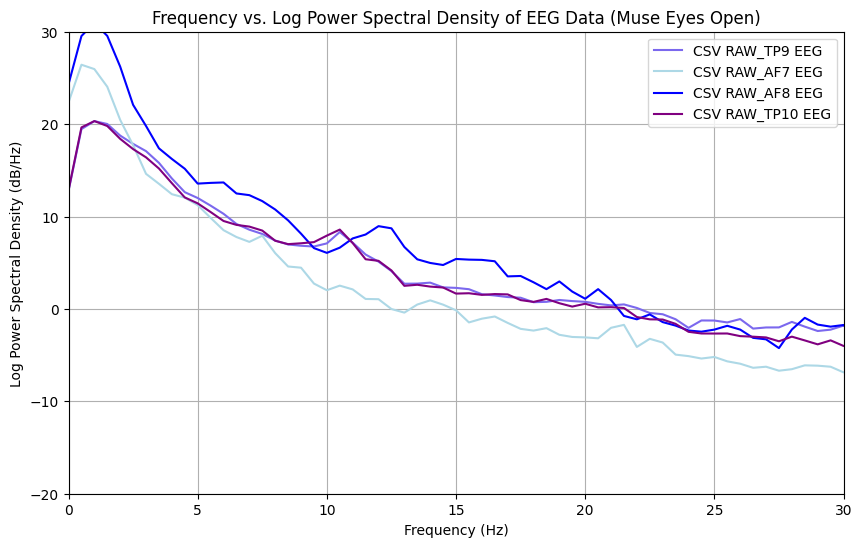

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sampling_frequency = 256
duration = 180
plt.figure(figsize=(10, 6))


csv_file_close22 = "/content/test_muse_data_open_22.txt"  # Replace with your file path
df_close22 = pd.read_csv(csv_file_close22)
eeg_data_close22 = df_close22.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close22, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP9 EEG', color='mediumslateblue')



csv_file_close23 = "/content/test_muse_data_open_23.txt"  # Replace with your file path
df_close23 = pd.read_csv(csv_file_close23)
eeg_data_close23 = df_close23.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close23, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF7 EEG', color='lightblue')


csv_file_close24 = "/content/test_muse_data_open_24.txt"  # Replace with your file path
df_close24 = pd.read_csv(csv_file_close24)
eeg_data_close24 = df_close24.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close24, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF8 EEG', color='blue')



csv_file_close25 = "/content/test_muse_data_open_25.txt"  # Replace with your file path
df_close25 = pd.read_csv(csv_file_close25)
eeg_data_close25 = df_close25.iloc[:, 0].values

frequencies_csv, psd_csv = welch(eeg_data_close25, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP10 EEG', color='purple')






plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data (Muse Eyes Open)")
plt.grid(True)
plt.xlim([0, 30])
plt.ylim([-20, 30])
plt.legend()
plt.show()

0               NaN
1        823.992674
2        839.304029
3        829.633700
4        817.948718
            ...    
36599    802.234432
36600    800.622711
36601    806.263736
36602    801.428571
36603           NaN
Name: RAW_TP9, Length: 36604, dtype: float64
0               NaN
1        803.846154
2        788.131868
3        784.102564
4        787.728938
            ...    
36599    800.219780
36600    792.161172
36601    808.681319
36602    817.948718
36603           NaN
Name: RAW_AF7, Length: 36604, dtype: float64


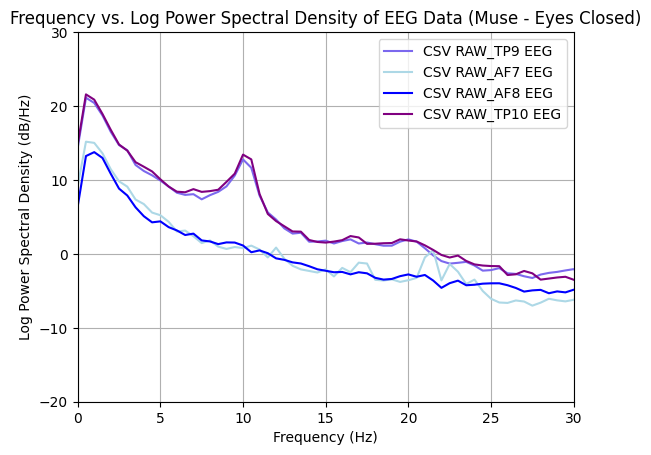

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

csv_file = "/content/Sheet 1-eyesclosed.csv"  # Replace with your file path
df = pd.read_csv(csv_file)

sampling_frequency = 256
duration = 180

# Extract column 21 (index 20), drop NaN, and convert to numeric

col21 = df.iloc[:, 21]
print(col21)
col21_clean = pd.to_numeric(col21, errors='coerce').dropna().values

# Compute PSD
frequencies_csv, psd_csv = welch(col21_clean, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP9 EEG', color='mediumslateblue')




col22 = df.iloc[:, 22]
col22_clean = pd.to_numeric(col22, errors='coerce').dropna().values
print(col22)
# Compute PSD
frequencies_csv, psd_csv = welch(col22_clean, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF7 EEG', color='lightblue')


col23 = df.iloc[:, 23]
col23_clean = pd.to_numeric(col23, errors='coerce').dropna().values

# Compute PSD
frequencies_csv, psd_csv = welch(col23_clean, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF8 EEG', color='blue')



col24 = df.iloc[:, 24]
col24_clean = pd.to_numeric(col24, errors='coerce').dropna().values

# Compute PSD
frequencies_csv, psd_csv = welch(col24_clean, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP10 EEG', color='purple')



# --- Final Plot Settings ---
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data (Muse - Eyes Closed)")
plt.grid(True)
plt.ylim([-20, 30])
plt.xlim([0,30])
plt.legend()
plt.show()

[803.44322344 807.06959707 813.51648352 ... 784.50549451 786.52014652
 786.11721612]


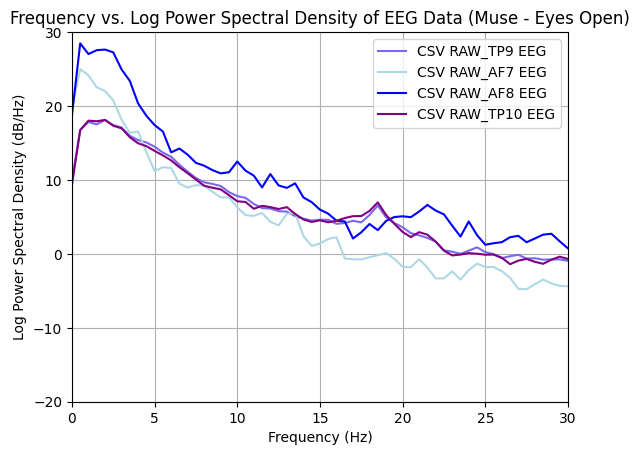

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

sampling_frequency = 450
duration = 180

csv_file = "/content/Sheet 1-eyesopen.csv"  # Replace with your file path
df = pd.read_csv(csv_file)

# Extract column 21 (index 20), drop NaN, and convert to numeric
col21 = df.iloc[:, 21]
col21_clean = pd.to_numeric(col21, errors='coerce').dropna().values


#print(col21)
# Compute PSD
frequencies_csv, psd_csv = welch(col21_clean, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP9 EEG', color='mediumslateblue')

#print(col21_clean)


col22 = df.iloc[:, 22]
col22_clean = pd.to_numeric(col22, errors='coerce').dropna().values

#print(col22_clean)
# Compute PSD
frequencies_csv, psd_csv = welch(col22_clean, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF7 EEG', color='lightblue')


col23 = df.iloc[:, 23]
col23_clean = pd.to_numeric(col23, errors='coerce').dropna().values

# Compute PSD
frequencies_csv, psd_csv = welch(col23_clean, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_AF8 EEG', color='blue')



col24 = df.iloc[:, 24]
col24_clean = pd.to_numeric(col24, errors='coerce').dropna().values
print(col24_clean)
# Compute PSD
frequencies_csv, psd_csv = welch(col24_clean, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_csv = 10 * np.log10(psd_csv)
plt.plot(frequencies_csv, log_psd_csv, label='CSV RAW_TP10 EEG', color='purple')



# --- Final Plot Settings ---
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data (Muse - Eyes Open)")
plt.grid(True)
plt.ylim([-20, 30])
plt.xlim([0,30])
plt.legend()
plt.show()